In the previous mini-lecture, we studied the basic structure of convolutional neural networks (CNNs). In this module we will try to build a CNN from scratch using a small dataset with Keras in TensorFlow. We mainly follow the standard textbook by Chollet (2018). 

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import shutil

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [238]:
path="C:\\Users\\gao\\GAO_Jupyter_Notebook\\Datasets"
os.chdir(path)

#path="C:\\Users\\pgao\\Documents\\PGZ Documents\\Programming Workshop\\PYTHON\\Open Courses on Python\\Udemy Course on Python\Introduction to Data Science Using Python\\datasets"
#os.chdir(path)

#### I. Binary Classification 

For the first example, we will be focusing on classifying images as dogs or cats in a dataset containing 4000 pictures of cats and dogs (2000 cats, 2000 dogs). We will be using 2000 for training, 1000 for validation and the rest for testing. The dataset can be downloaded here: https://www.kaggle.com/c/dogs-vs-cats/data. 

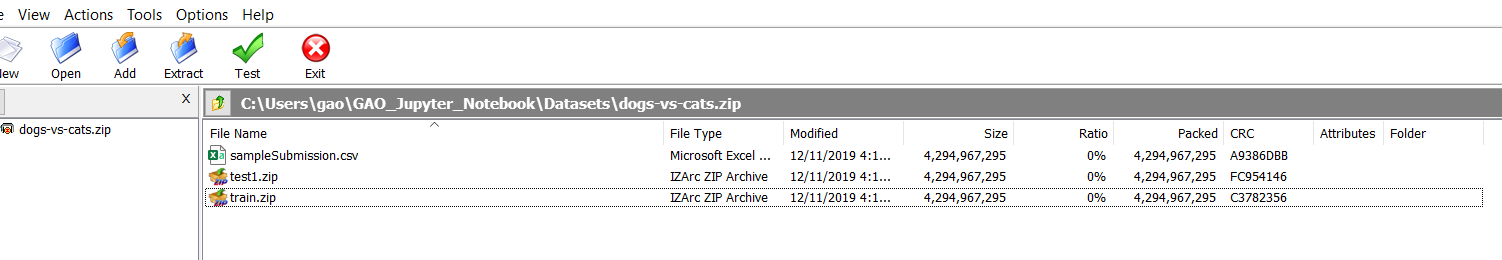

In [240]:
from IPython.display import Image
Image("cats and dogs zip structure.PNG", height=750, width=750)

We first train the model from scratch. For image processing data, how we organize image files is important to do the train-test-split. Here, the original data are all in a zipped file. We will first need to unzip the files and place them in the 'base_dir' location defined below:

In [123]:
base_dir = path+'\\dogs cats folder\\'  # this is the directory path where we can uncompress the data and place the files 
print(base_dir)
if os.path.isdir(base_dir): # if the directory already exists, then pass
    print('directory already exists')
    pass
else:
    os.mkdir(base_dir) # otherwise make a directory

C:\Users\gao\GAO_Jupyter_Notebook\Datasets\dogs cats folder\
directory already exists


Next, we create subfolders within the 'base_dir location': a folder for train, a folder for validation, and a folder for test.

In [124]:
train_dir = os.path.join(base_dir, 'train')
if os.path.isdir(train_dir):
    pass
else:
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if os.path.isdir(validation_dir):
    pass
else:
    os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if os.path.isdir(test_dir):
    pass
else:
    os.mkdir(test_dir)

print(train_dir)
print(test_dir)
print(validation_dir)

C:\Users\gao\GAO_Jupyter_Notebook\Datasets\dogs cats folder\train
C:\Users\gao\GAO_Jupyter_Notebook\Datasets\dogs cats folder\test
C:\Users\gao\GAO_Jupyter_Notebook\Datasets\dogs cats folder\validation


Next, within each subfolder (train, validation, test), we make more subfolders under them. For each of the three subfolders aforementioned, we create respective subfolders for cats and dogs:

In [33]:
train_cats_dir = train_dir+'\\cats'
print(train_cats_dir)
if os.path.isdir(train_cats_dir):
    pass
else:
    os.mkdir(train_cats_dir)

train_dogs_dir = train_dir+'\\dogs'
print(train_dogs_dir)
if os.path.isdir(train_dogs_dir):
    pass
else:
    os.mkdir(train_dogs_dir)

validation_cats_dir = validation_dir+'\\cats'
print(validation_cats_dir)
if os.path.isdir(validation_cats_dir):
    pass
else:
    os.mkdir(validation_cats_dir)

validation_dogs_dir = validation_dir+'\\dogs'
print(validation_dogs_dir)
if os.path.isdir(validation_dogs_dir):
    pass
else:
    os.mkdir(validation_dogs_dir)
    
test_cats_dir = test_dir+'\\cats'
print(test_cats_dir)
if os.path.isdir(test_cats_dir):
    pass
else:
    os.mkdir(test_cats_dir)

test_dogs_dir = test_dir+'\\dogs'
print(test_dogs_dir)
if os.path.isdir(test_dogs_dir):
    pass
else:
    os.mkdir(test_dogs_dir)

C:\Users\gao\GAO_Jupyter_Notebook\Datasets\dogs cats folder\train\cats
C:\Users\gao\GAO_Jupyter_Notebook\Datasets\dogs cats folder\train\dogs
C:\Users\gao\GAO_Jupyter_Notebook\Datasets\dogs cats folder\validation\cats
C:\Users\gao\GAO_Jupyter_Notebook\Datasets\dogs cats folder\validation\dogs
C:\Users\gao\GAO_Jupyter_Notebook\Datasets\dogs cats folder\test\cats
C:\Users\gao\GAO_Jupyter_Notebook\Datasets\dogs cats folder\test\dogs


For the first exercise, we will only use a small portion of the data and then create three subsets: a training set with 1000 samples of each class, a validation set with 500 samples of each class, and a test set with 500 samples of each class. This way the data won't have imbalance issues.

In [119]:
print('Copying JPG images starts...\n')

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames: # copying the first 1000 cat images to train_cats_dir
    src = os.path.join(base_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    if os.path.isfile(src):
        pass
    else:
        shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames: # copying the next 500 cat images to validation_cats_dir
    src = os.path.join(base_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    if os.path.isfile(src):
        pass
    else:
        shutil.copyfile(src, dst)


fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames: # copying the next 500 cat images to test_cats_dir
    src = os.path.join(base_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    if os.path.isfile(src):
        pass
    else:
        shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames: # copying the first 1000 dog images to train_dogs_dir
    src = os.path.join(base_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    if os.path.isfile(src):
        pass
    else:
        shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames: # copying the next 500 dog images to validation _dogs_dir
    src = os.path.join(base_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    if os.path.isfile(src):
        pass
    else:
        shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames: # copying the next 500 dog images to test_dogs_dir
    src = os.path.join(base_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    if os.path.isfile(src):
        pass
    else:
        shutil.copyfile(src, dst)

print('Copying JPG images completed.')

Copying JPG images starts...

Copying JPG images completed.


As a sanity check, let's count how many pictures are in each training split:

In [42]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


Because we're attacking a binary-classification problem, we will end the network with a single unit (a dense layer of size 1) and a sigmoid activation. This unit will encode the probability that the network is looking at one class or the other. For the compilation step, we will go with the 'RMSprop' optimizer, as usual. Because we ended the network with a single sigmoid unit, we will use the binary crossentropy as the loss function. 

In [45]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3))) # input layer
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) # the flatten layer

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [47]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPG files, so the steps for getting it into the network are roughly as follows:

   1. Read the picture files.
   2. Decode the JPEG content to RGB grids of pixels.
   3. Convert these into floating-point tensors.
   4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (neural networks prefer to deal with small input values).

It may seem a bit daunting, but fortunately Keras API has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at "keras.preprocessing.image". In particular, it contains the class ImageDataGenerator(), which lets us quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors:

In [49]:
train_datagen = ImageDataGenerator(rescale=1.0/255) # rescaling all images by 1/255
validation_datagen = ImageDataGenerator(rescale=1.0/255) # rescaling all images by 1/255
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's look at the output of one of these generators: it yields batches of 150-by-150 RGB images (shape (20, 150, 150, 3)) and binary labels (shape (20,)). There are 20 samples in each batch (the batch size). Note that the generator yields these batches indefinitely: it loops endlessly over the images in the target folder. For this reason, we need to break the iteration loop at some point. In addition, because the batch size is 32, we have 1000 pictures altogether, we will see that each batch contains 32 pictures:

In [194]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 150, 150, 3)
labels batch shape: (32,)


Let's look more closely at the generator and understand the data structure. As we see from the code above (how we wrote the loop statement), we suspect that thte train_generator acts like a tuple. Indeed, we can treat the object train_generator[j] as a tuple: the first element is the data matrix and the second element is the label vector. So if we write trainn_generator[j][l][m], ($l=0$ or $l=1$, $j,l,m <=31$) that indicates the $j$th batch, the $l$th componenent (0 means pixel matrix and 1 means label), and $m$th picture:

In [224]:
print(len(train_generator[0]))
print(type(train_generator[5]))

2
<class 'tuple'>


In [230]:
print(train_generator[0][0].shape)
print(train_generator[0][0][31].shape) # the 3rd argument must be less than 32 
print(validation_generator[31][1]) # the first element cannot exceed 32
print(validation_generator[0][1][2])

(32, 150, 150, 3)
(150, 150, 3)
[0. 1. 1. 1. 0. 1. 0. 1.]
1.0


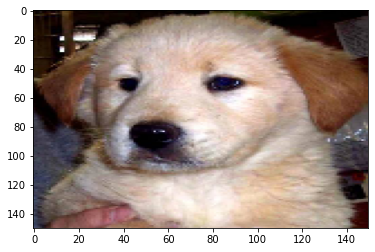

first batch's labels:  [0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1.]
second batch's labels:  [0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 0.]
last batch's labels:  [0. 1. 1. 1. 0. 1. 0. 1.]


In [235]:
plt.imshow(validation_generator[1][0][8],aspect="auto") # the 2nd batch, the pixel matrix, the 7th element (picture)
plt.show() # lookinf at the picture

print("first batch's labels: ", validation_generator[0][1]) # first batch's labels
print("second batch's labels: ", validation_generator[1][1])  # 2nd batch's labels
print("last batch's labels: ", validation_generator[31][1]) # the last batch's labels

We now train the model (first iteration) and then save the model (always a good practice):

In [51]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 45s 452ms/step - loss: 0.6903 - acc: 0.5325 - val_loss: 0.6824 - val_acc: 0.5010
Epoch 2/30
100/100 [==============================] - 46s 461ms/step - loss: 0.6585 - acc: 0.6130 - val_loss: 0.6362 - val_acc: 0.6430
Epoch 3/30
100/100 [==============================] - 47s 471ms/step - loss: 0.6224 - acc: 0.6420 - val_loss: 0.6234 - val_acc: 0.6320
Epoch 4/30
100/100 [==============================] - 46s 462ms/step - loss: 0.5739 - acc: 0.7150 - val_loss: 0.5947 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 47s 467ms/step - loss: 0.5415 - acc: 0.7360 - val_loss: 0.5901 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 46s 455ms/step - loss: 0.5102 - acc: 0.7440 - val_loss: 0.5802 - val_acc: 0.7000
Epoch 7/30
100/100 [=

In [53]:
model.save('cats_and_dogs_small_1.h5')

Let’s plot the loss and accuracy of the model over the training and validation data during training:

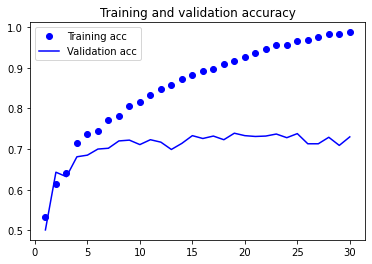

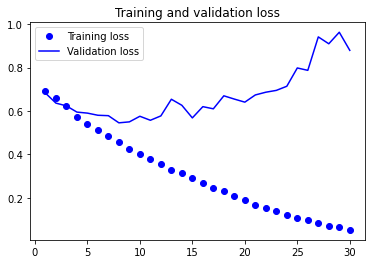

In [54]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

These plots are characteristic of overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0. Because we have relatively few training samples (2000), overfitting will be the no.1 concern. We already know about a number of techniques that can help
mitigate overfitting, such as dropout and weight decay (L2 regularization). We are now going to work with a new one, specific to computer vision and used almost universally when processing images with deep-learning models: data augmentation.

Overfitting is caused by having too few samples to learn from, rendering you unable to train a model that can generalize to new data. Given infinite data, the model would be exposed to every possible aspect of the data distribution at hand. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, the model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

In Tensor's Keras API, this can be done by configuring a number of random transformations to be performed on the images read by the ImageDataGenerator() instance. Let’s get started with an example:

In [55]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             shear_range=0.2, 
                             zoom_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest')
type(datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

These are just a few of the options available (for more, see the Keras documentation). Let’s quickly go over this code:

   - _rotation_range_ is a value in degrees (0–180), a range within which to randomly rotate pictures.
   - _width_shift_ and _height_shift_ are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
   - _shear_range_ is for randomly applying shearing transformations.
   - _zoom_range_ is for randomly zooming inside pictures.
   - _horizontal_flip_ is for randomly flipping half the images horizontally—relevant when there are no assumptions of horizontal asymmetry (for example, real-world pictures).
   - _fill_mode_ is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
   
Let's look at an example of augmented images in the training dataset:

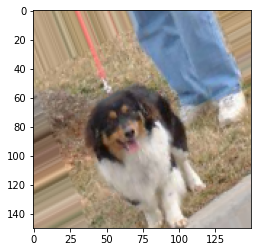

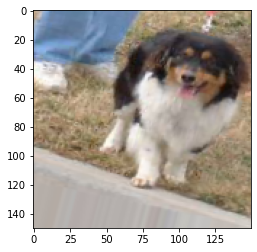

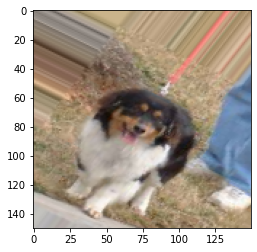

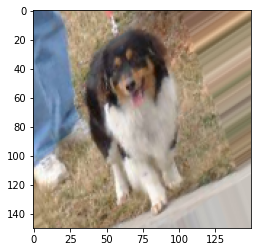

In [143]:
fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]
img_path = fnames[112] # choosing one random image to augment
img = image.load_img(img_path, target_size=(150, 150)) # reading the image and resizing it

x = image.img_to_array(img) # converting it to a numpy.ndarray with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # reshaping it to (1, 150, 150, 3)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i) # generating batches of randomly transformed images and looping it indefinitely until some break point
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

Let’s train the network using data augmentation and dropout (applied right before the densely connected classifier):

In [76]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

#--------------------
train_datagen = ImageDataGenerator(rescale=1.0/255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

history2 = model.fit(train_generator, 
                    # steps_per_epoch=20, # total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
                    epochs=150, 
                    validation_data=validation_generator, 
                    #validation_steps=50
                   )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 63 steps, validate for 32 steps
Epoch 1/100
63/63 [==============================] - 49s 771ms/step - loss: 0.6966 - acc: 0.4945 - val_loss: 0.6876 - val_acc: 0.5040
Epoch 2/100
63/63 [==============================] - 53s 834ms/step - loss: 0.6894 - acc: 0.5370 - val_loss: 0.6829 - val_acc: 0.5490
Epoch 3/100
63/63 [==============================] - 49s 779ms/step - loss: 0.6803 - acc: 0.5485 - val_loss: 0.7404 - val_acc: 0.5010
Epoch 4/100
63/63 [==============================] - 48s 755ms/step - loss: 0.6631 - acc: 0.5845 - val_loss: 0.6692 - val_acc: 0.5700
Epoch 5/100
63/63 [==============================] - 47s 751ms/step - loss: 0.6559 - acc: 0.6065 - val_loss: 0.6352 - val_acc: 0.6280
Epoch 6/100
63/63 [==============================] - 49s 772ms/step - loss: 0.6388 - acc: 0.6290 - val_loss: 0.6272 - val_acc: 0.6470
Epoch 7/100
63/63 [=

Notice that we commented out a few arguments in the model.fit() instance, as these parameters sometimes can cause the model training to prematurely end (say when we don't have enough training sample). Let's see the validation:

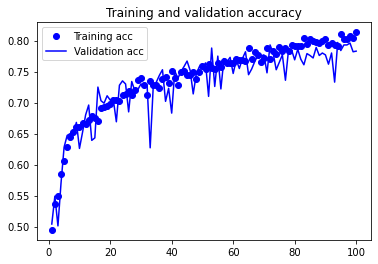

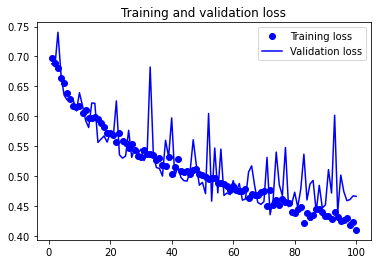

In [77]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [79]:
model.save('cats_and_dogs_small_2.tf')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: cats_and_dogs_small_2.tf\assets


We now see the result looks a lot better. We can save the model now and then later pick up the training from where we left off:

In [85]:
# loading the saved model
loaded_model = tf.keras.models.load_model('cats_and_dogs_small_2.tf')

history3 = loaded_model.fit(train_generator, 
                            epochs=100, 
                            validation_data=validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 63 steps, validate for 32 steps
Epoch 1/100
63/63 [==============================] - 49s 781ms/step - loss: 0.4127 - acc: 0.8080 - val_loss: 0.4308 - val_acc: 0.8060
Epoch 2/100
63/63 [==============================] - 47s 748ms/step - loss: 0.4164 - acc: 0.8085 - val_loss: 0.4780 - val_acc: 0.7740
Epoch 3/100
63/63 [==============================] - 48s 755ms/step - loss: 0.4230 - acc: 0.8105 - val_loss: 0.4468 - val_acc: 0.7840
Epoch 4/100
63/63 [==============================] - 47s 747ms/step - loss: 0.4188 - acc: 0.7925 - val_loss: 0.4948 - val_acc: 0.7760
Epoch 5/100
63/63 [==============================] - 50s 788ms/step - loss: 0.4239 - acc: 0.8020 - val_loss: 0.4540 - val_acc: 0.7830
Epoch 6/100
63/63 [==============================] - 47s 743ms/step - loss: 0.4034 - acc: 0.8180 - val_loss: 0.5521 - val_acc: 0.7510
Epoch 7/100
63/63 [==============================] - 48s 756ms/step - loss: 0.4021 - acc: 0.8105 - val_l

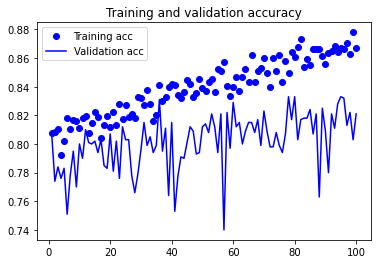

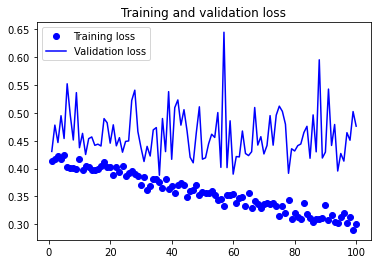

In [86]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

As we see, the valiadation error gets a little better than before but most of the time it keeps fluctuating and the training error keeps decreasing. This is a sign of some portion of examples being classified randomly, which produces fluctuations, as the number of correct random guesses always fluctuate (imagine accuracy when coin should always return "heads"). Basically sensitivity to noise (when classification produces random result) is a common definition of overfitting. 

Another common indicator of overfitting is rising loss,  which is often more sensitive to the noisy prediction if it's not squashed by sigmoids/thresholds. Intuitively, we can imagine a situation when network is too sure about output (when it's wrong), it gives a value far away from threshold in case of random misclassification.

Regardless of the case, we need more data, and we may consider reduce the learning rate to improve the model performance.

In [110]:
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=32, 
                                                  class_mode='binary')

Found 1000 images belonging to 2 classes.


In [221]:
def load_image(filename): # loading and preparing the image
    img = load_img(filename, target_size=(150, 150))
    img = img_to_array(img) # converting to arrays
    img = img.reshape(1, 150, 150, 3) # reshaping into a single sample with 3 channels
    img = img.astype('float32')
    # img = img - [123.68, 116.779, 103.939] # centering
    return img

def run_example(sample_image): # loading an image and predicting the class
    simg = load_image(sample_image)
    result = model.predict(simg)
    print(result[0])

run_example("C:\\Users\\gao\\GAO_Jupyter_Notebook\\Datasets\\dogs cats folder\\test\cats\\cat.1503.jpg")
run_example("C:\\Users\\gao\\GAO_Jupyter_Notebook\\Datasets\\dogs cats folder\\test\cats\\cat.1509.jpg")
run_example("C:\\Users\\gao\\GAO_Jupyter_Notebook\\Datasets\\dogs cats folder\\test\cats\\cat.1821.jpg")

run_example("C:\\Users\\gao\\GAO_Jupyter_Notebook\\Datasets\\dogs cats folder\\test\dogs\\dog.1503.jpg")
run_example("C:\\Users\\gao\\GAO_Jupyter_Notebook\\Datasets\\dogs cats folder\\test\dogs\\dog.1608.jpg")
run_example("C:\\Users\\gao\\GAO_Jupyter_Notebook\\Datasets\\dogs cats folder\\test\dogs\\dog.1932.jpg")

[0.]
[1.]
[1.]
[1.]
[1.]
[1.]


#### II. Classifying Multiple Categories Using the MNIST Data

We now use the famous MNIST dataset for a classification task with more than 2 types of labels. The Fashion MNIST data set contains 70000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

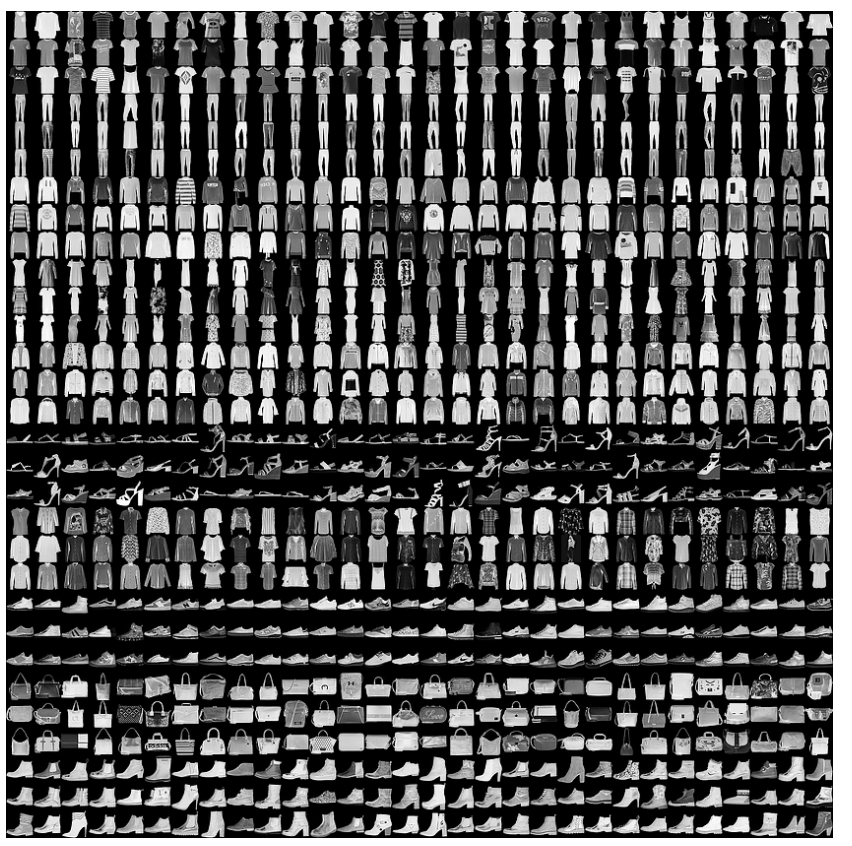

In [241]:
from IPython.display import Image
Image("MNIST.PNG", height=600, width=600)

Let's process the data. Recall that when using a convolutional layer as the first layer to our model, we need to reshape our data to (number_of_images, x_shape, y_shape, channels). All we really need to know is that you should set channels to 1 for grayscale images and set channels to 3 when you have a set of RGB-images as input. Let's load the data:

In [243]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [247]:
train_X = train_X.reshape(-1, 28,28, 1) # the value -1 means 'newshape' is inferred from the length of the array and remaining dimensions
test_X = test_X.reshape(-1, 28,28, 1) # -1 is the same as specifying the total number of images in the training set

print(train_X.shape)
print(test_X.shape)

print(train_Y.shape)
print(test_Y.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In addition, modifying the values of each pixel such that they range from 0 to 1 will improve the rate at which our model learns (normalization):

In [248]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

Our model cannot work with categorical data directly. Ergo we must use one hot encoding. In one hot encoding, the digits 0 through 9 are represented as a set of nine zeros and a single one. The digit is determined by the location of the number 1. For example, we'd represent a 3 as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]:

In [249]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Now let's set up our network. Our convolutional layers will have 64 neurons (feature maps) and a $3 \times 3$ feature detector. In turn, our pooling layers will use max pooling with a $2 \times 2$ matrix:

In [259]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, (3,3)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))

model.add(layers.Dense(64))
model.add(layers.Dense(10))
model.add(layers.Activation('softmax'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_4 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 1600)            

In [261]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=optimizers.Adam(),metrics=['accuracy'])

Now let's fit the model and look at validation curve:

In [262]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 38s 634us/sample - loss: 0.5076 - accuracy: 0.8160
Epoch 2/15
60000/60000 [==============================] - 37s 624us/sample - loss: 0.3602 - accuracy: 0.8704
Epoch 3/15
60000/60000 [==============================] - 39s 643us/sample - loss: 0.3203 - accuracy: 0.8829
Epoch 4/15
60000/60000 [==============================] - 38s 633us/sample - loss: 0.2984 - accuracy: 0.8914
Epoch 5/15
60000/60000 [==============================] - 37s 624us/sample - loss: 0.2841 - accuracy: 0.8960
Epoch 6/15
60000/60000 [==============================] - 37s 615us/sample - loss: 0.2727 - accuracy: 0.8995
Epoch 7/15
60000/60000 [==============================] - 37s 617us/sample - loss: 0.2596 - accuracy: 0.9043
Epoch 8/15
60000/60000 [==============================] - 37s 622us/sample - loss: 0.2556 - accuracy: 0.9054
Epoch 9/15
60000/60000 [==============================] - 37s 617us/sample - loss: 0.2465 - accuracy: 0.9

In [265]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 146us/sample - loss: 0.2657 - accuracy: 0.9042
Test loss: 0.26571569749116897
Test accuracy: 0.9042


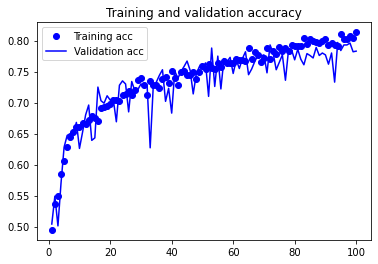

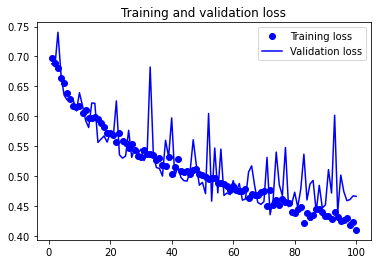

In [266]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Let's make predictions on the first image. Our model correctly classified the first image in our testing data set:

9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


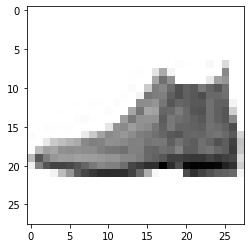

In [269]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))
print(test_Y_one_hot[0])
print(test_Y[0])
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary) # displaying the first image
plt.show()

#### References:
   - https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/
   - https://cs231n.github.io/convolutional-networks/#conv
   - https://www.cs.toronto.edu/~kriz/cifar.html 
   - https://www.kaggle.com/c/dogs-vs-cats/data
   - https://stackoverflow.com/questions/60315137/data-augmentation-generators-not-working-with-tensorflow-2-0
   - Goodfellow, Ian and Bengio, Yoshua and Courville, Aaron (2016). Deep Learning. MIT Press.
   - Stein, E., Weiss, G. (1971). Introduction to Fourier Analysis on Euclidean Spaces, Princeton University Press.
   - Chollet, Francois. Deep Learning with Python, 2018. Print.